In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## IMPORTING DEPENDENCIES

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display

import tensorflow as tf 
from sklearn.model_selection import train_test_split

## TRAIN, TEST, VALIDATION DATA RETRIEVAL

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, GRU, Input, Conv1D, MaxPooling1D, LSTM
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
X_train = np.load('/content/gdrive/MyDrive/data/Augmented1/X_train.npy')
y_train = np.load('/content/gdrive/MyDrive/data/Augmented1/y_train.npy')
X_test = np.load('/content/gdrive/MyDrive/data/Augmented1/X_test.npy')
y_test = np.load('/content/gdrive/MyDrive/data/Augmented1/y_test.npy')
X_val = np.load('/content/gdrive/MyDrive/data/Augmented1/X_val.npy')
y_val = np.load('/content/gdrive/MyDrive/data/Augmented1/y_val.npy')

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(16893, 98) (16893, 2)
(2109, 98) (2109, 2)
(2088, 98) (2088, 2)


## NEURAL NETWORK MODEL

In [6]:
model = Sequential()
model.add(Conv1D(64, 5, activation='relu', input_shape=(98,1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPooling1D(2))

model.add(GRU(64, return_sequences=True))
model.add(LSTM(64))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Activation('relu'))
model.add(Dense(2, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 94, 64)            384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 47, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 43, 64)            20544     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 21, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 17, 32)            10272     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 8, 32)            0

In [7]:
optimizer=tf.keras.optimizers.Adam(amsgrad=True, name='Adam')

In [8]:
model.compile(
    loss="categorical_crossentropy",
    optimizer = optimizer,
    metrics=['accuracy']
)

In [9]:
print("Model Score: \n")
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 120, shuffle = False)

Model Score: 

Epoch 1/120
528/528 [==============================] - 22s 11ms/step - loss: 0.4378 - accuracy: 0.7762 - val_loss: 0.2382 - val_accuracy: 0.9109
Epoch 2/120
528/528 [==============================] - 5s 10ms/step - loss: 0.2143 - accuracy: 0.9226 - val_loss: 0.2060 - val_accuracy: 0.9243
Epoch 3/120
528/528 [==============================] - 5s 9ms/step - loss: 0.1780 - accuracy: 0.9344 - val_loss: 0.2119 - val_accuracy: 0.9282
Epoch 4/120
528/528 [==============================] - 4s 8ms/step - loss: 0.1600 - accuracy: 0.9407 - val_loss: 0.1898 - val_accuracy: 0.9373
Epoch 5/120
528/528 [==============================] - 4s 8ms/step - loss: 0.1457 - accuracy: 0.9471 - val_loss: 0.1721 - val_accuracy: 0.9411
Epoch 6/120
528/528 [==============================] - 6s 11ms/step - loss: 0.1319 - accuracy: 0.9522 - val_loss: 0.1643 - val_accuracy: 0.9454
Epoch 7/120
528/528 [==============================] - 4s 8ms/step - loss: 0.1238 - accuracy: 0.9564 - val_loss: 0.1662 - v

In [10]:
model.save("/content/gdrive/MyDrive/Models/CRNN_GRULSTM_Standalone_WithDense_Lite.h5")
score = model.evaluate(X_test, y_test)
print(score)

66/66 [==============================] - 0s 6ms/step - loss: 0.1321 - accuracy: 0.9834
[0.13208195567131042, 0.9834044575691223]


In [11]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9470 sha256=0726878fb261c91620de9b6c85c8f7a9b85df53247afcb3b8b4116f232fa93a8
  Stored in directory: /root/.cache/pip/wheels/aa/0a/0f/0775c812151040fb695c0890d902810a9d69e1db50181e5328
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320515 sha256=5890889ccf091b7f0a8f3271d6144d276dfc6a5cbb5af4366de15bb68d167cc6
  Stored in directory: /root/.cache/pip/wheels/d2/50/d6/95e7c7713c3c1609e30a394d7431ffc11e4f7deb82d13ffceb
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

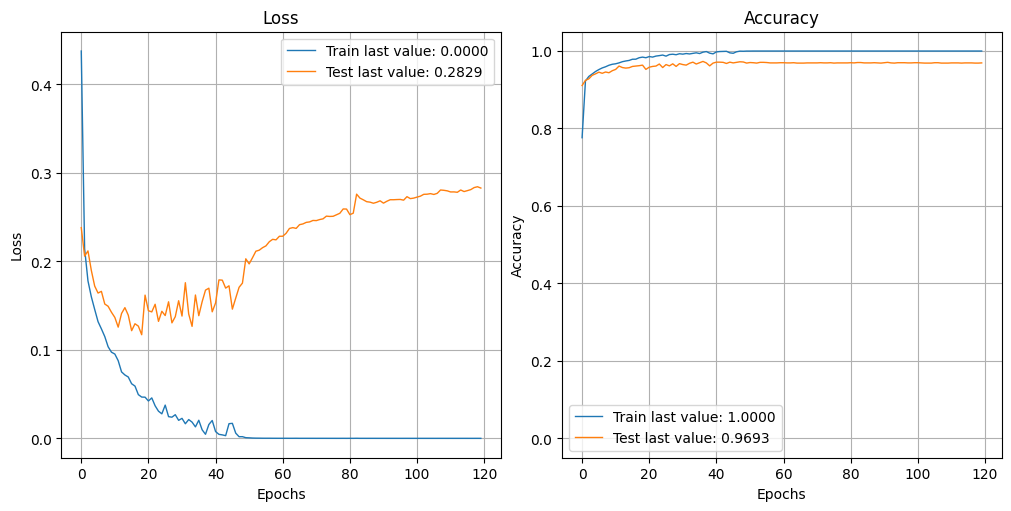

In [12]:
from plot_keras_history import show_history, plot_history
plot_history(history)

In [13]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model Classification Report: 

66/66 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1049
           1       0.98      0.98      0.98      1060

    accuracy                           0.98      2109
   macro avg       0.98      0.98      0.98      2109
weighted avg       0.98      0.98      0.98      2109

Confusion matrix, without normalization
[[1031   18]
 [  17 1043]]


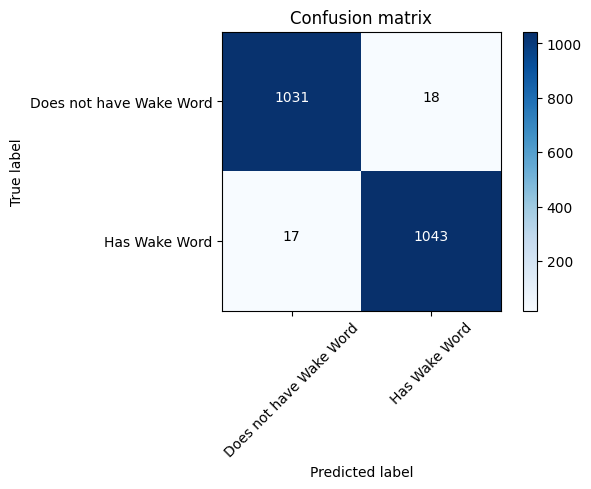

In [14]:
print("Model Classification Report: \n")
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
plot_confusion_matrix(cm, classes=["Does not have Wake Word", "Has Wake Word"])

##PREDICTION & LATENCY

In [15]:
pip install spafe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 4.8 MB/s eta 0:00:00


In [16]:
import spafe
from spafe.features.lfcc import lfcc
import pywt

In [17]:
def predict(audio):
  audio_data, sr = librosa.load(audio)

  wavelet = 'db4'
  level = 4
  coeffs = pywt.wavedec(audio_data, wavelet, level=level)
  threshold = np.median(np.abs(coeffs[-level])) / 0.6745
  for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold)
  denoised_audio = pywt.waverec(coeffs, wavelet)

  lfccs  = lfcc(denoised_audio, fs = sr, num_ceps=13)
  lfccs_processed = np.mean(lfccs.T, axis=0) # some pre-processing
  lfccs_new = np.expand_dims(np.asarray(lfccs_processed), axis=0)
  predictions = model.predict(lfccs_new)
  return predictions

In [18]:
audio_for_pred = "/content/gdrive/MyDrive/Marvin/marvin (170).wav"
print(np.round(predict(audio_for_pred)))

1/1 [==============================] - 0s 233ms/step
[[0. 1.]]


In [19]:
audio_for_pred = "/content/gdrive/MyDrive/False/yes (824).wav"
print(np.round(predict(audio_for_pred)))

1/1 [==============================] - 0s 34ms/step
[[1. 0.]]
